## <font color=darkblue> NETWORK WITH NO HIDDEN LAYERS (LOGISTIC REGRESSION)

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
import vnns

<font color=darkblue> Let's start with the most simple case of logistic regression where there are no hidden layers (hidden_units = [ ]) and no polynomial regression (polydeg = 1.) Features will be first normalized and parameters (weights and bias terms) will be initialized using 'deep' initialization. We will use gradient descent ('GD') with learning_rate = 'auto' to enable automated selection of the learning rate.  Regularization parameter lamda will also be set to 'auto' so that it's optimal value is computed by the script.

<font color=darkblue> As mentioned in the introduction, we have 15 "medium" data files. The first step is a quick scan where we plot only the training set decision boundary (by setting plot_output = True) and display the summary table for each dataset:



*** Data: linear1 ***


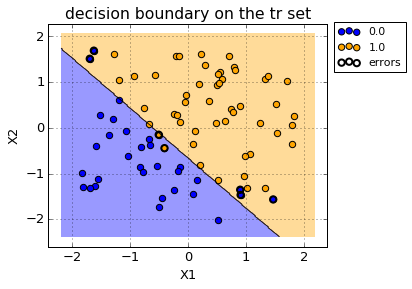

,data,normalize,method,num iter,exec time,poly deg,hidden layers,lamda,tr score,test score
0,linear1,True,GD,36,0.015363,1,[],10.0,0.914,0.947




*** Data: linear2 ***


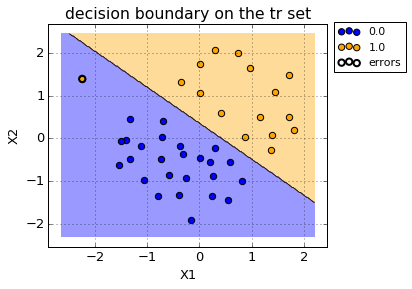

,data,normalize,method,num iter,exec time,poly deg,hidden layers,lamda,tr score,test score
0,linear2,True,GD,88,0.034269,1,[],3.0,0.976,1.0




*** Data: linear3 ***


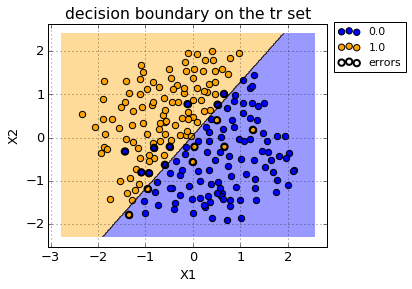

,data,normalize,method,num iter,exec time,poly deg,hidden layers,lamda,tr score,test score
0,linear3,True,GD,17,0.004739,1,[],3.0,0.924,0.93




*** Data: elliptic1 ***


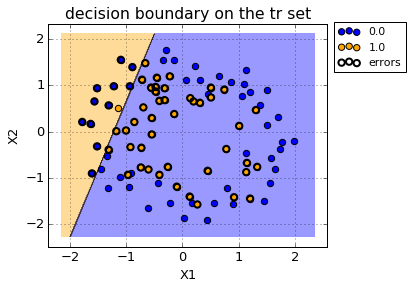

,data,normalize,method,num iter,exec time,poly deg,hidden layers,lamda,tr score,test score
0,elliptic1,True,GD,11,0.004756,1,[],10.0,0.432,0.435




*** Data: elliptic2 ***


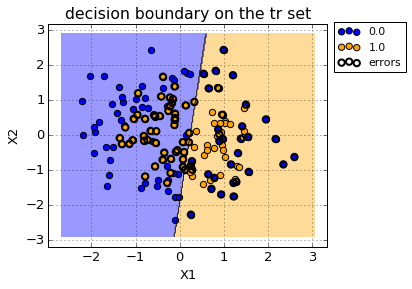

,data,normalize,method,num iter,exec time,poly deg,hidden layers,lamda,tr score,test score
0,elliptic2,True,GD,6,0.002421,1,[],10.0,0.497,0.436




*** Data: elliptic3 ***


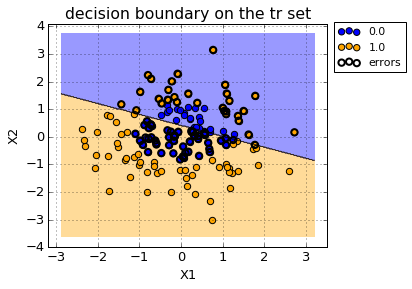

,data,normalize,method,num iter,exec time,poly deg,hidden layers,lamda,tr score,test score
0,elliptic3,True,GD,4,0.001776,1,[],3.0,0.491,0.385




*** Data: elliptic4 ***


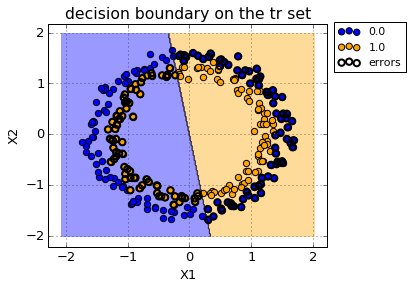

,data,normalize,method,num iter,exec time,poly deg,hidden layers,lamda,tr score,test score
0,elliptic4,True,GD,5,0.001998,1,[],10.0,0.5,0.51




*** Data: complex1 ***


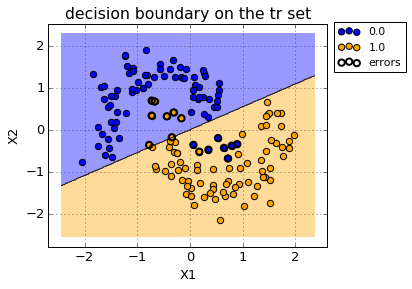

,data,normalize,method,num iter,exec time,poly deg,hidden layers,lamda,tr score,test score
0,complex1,True,GD,13,0.003301,1,[],1.0,0.901,0.821




*** Data: complex2 ***


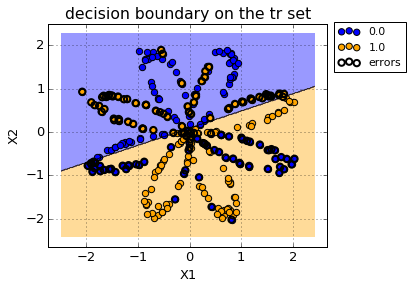

,data,normalize,method,num iter,exec time,poly deg,hidden layers,lamda,tr score,test score
0,complex2,True,GD,6,0.002292,1,[],3.0,0.564,0.519




*** Data: complex3 ***


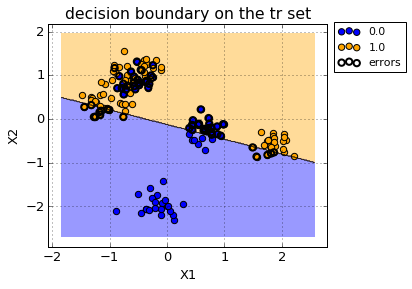

,data,normalize,method,num iter,exec time,poly deg,hidden layers,lamda,tr score,test score
0,complex3,True,GD,11,0.003204,1,[],10.0,0.609,0.641




*** Data: complex4 ***


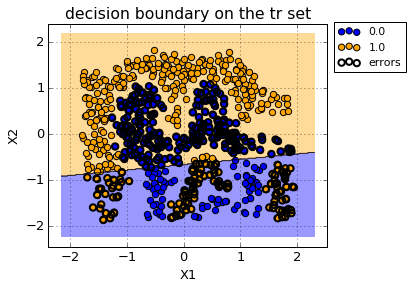

,data,normalize,method,num iter,exec time,poly deg,hidden layers,lamda,tr score,test score
0,complex4,True,GD,7,0.003142,1,[],10.0,0.491,0.471




*** Data: complex5 ***


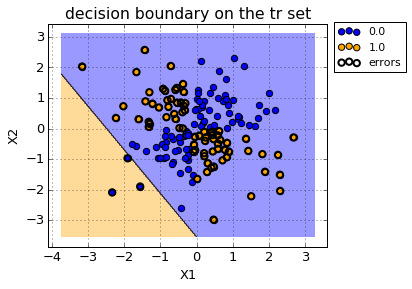

,data,normalize,method,num iter,exec time,poly deg,hidden layers,lamda,tr score,test score
0,complex5,True,GD,18,0.006553,1,[],3.0,0.522,0.308




*** Data: multiclass1 ***


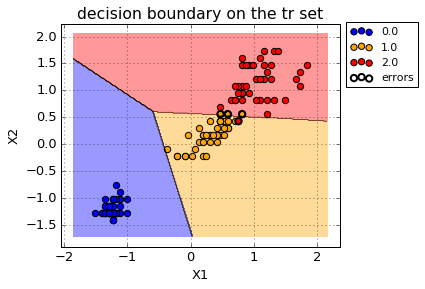

,data,normalize,method,num iter,exec time,poly deg,hidden layers,lamda,tr score,test score
0,multiclass1,True,GD,48,0.018978,1,[],0.3,0.968,0.84




*** Data: multiclass2 ***


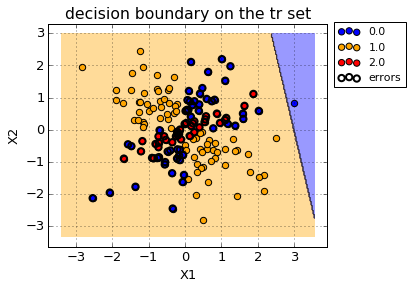

,data,normalize,method,num iter,exec time,poly deg,hidden layers,lamda,tr score,test score
0,multiclass2,True,GD,6,0.004339,1,[],10.0,0.472,0.513




*** Data: multiclass3 ***


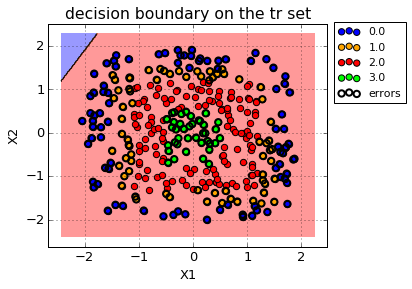

,data,normalize,method,num iter,exec time,poly deg,hidden layers,lamda,tr score,test score
0,multiclass3,True,GD,9,0.00812,1,[],10.0,0.407,0.383


In [3]:
for data in ['linear1','linear2','linear3','elliptic1','elliptic2','elliptic3','elliptic4','complex1','complex2',
            'complex3','complex4','complex5','multiclass1','multiclass2','multiclass3']:
    print("\n\n*** Data:", data, "***")
    dla = vnns.DeepLearnAuto(datafile = "Data\\Medium\\"+data+"_tr.csv", 
                             normalize = True,                             
                             polydeg = 1,
                             method = 'GD', 
                             initialize = 'deep',
                             learning_rate= 'auto', 
                             lamda = 'auto',
                             maxiter = 10000, 
                             hidden_units = [],
                             plot_output = True)
    summary = dla.generate_summary()
    display(summary)

<font color=darkblue> Not surprisingly, most of the data are too complex to be separated by a linear decision boundary. Per our criterion of training score + test score >= 1.8, those which could be successfully separated are: linear1, linear2, linear3, and multiclass1. Below, we re-run those files by setting plot_J, report_summary, plot_output, plot_test, and plot_lam flags to True so that we get more insight into how regularized training and test scores are obtained. You can refer to class DeepLearnAuto() and its find_bestlambda method to understand how the algorithm to find the optimal lamda works.



*** Data: linear1 ***


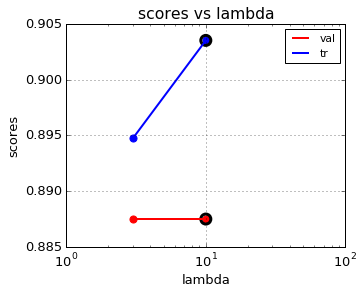

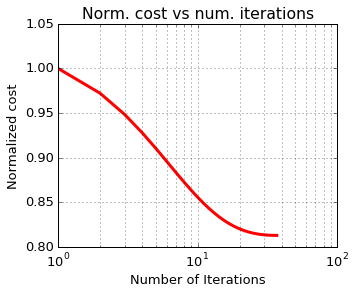


data:
	file: Data\Medium\linear1_tr.csv
	m = 81 training examples
	n = 2 features
	original classes: [0.0, 1.0]
	number of samples in class 0 = 31
	number of samples in class 1 = 50
solver:
	feature normalization: yes
	polynomial regression: no
	neural network config: [2, 1]
	regularization: yes (lambda = 10.0)
	method: GD
	learning rate = 0.27
output:
	* Converged
	initial cost = 0.298600335842
	final cost = 0.242751904498
	number of iterations = 36
	accuracy on the training set: 0.914
	execution time:  0.013819  sec


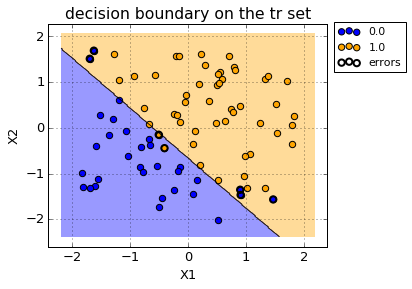

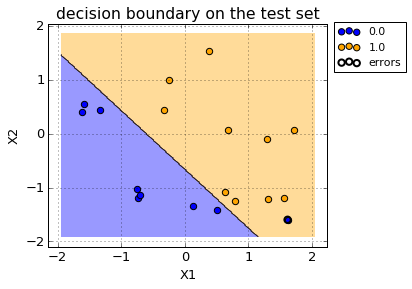



*** Data: linear2 ***


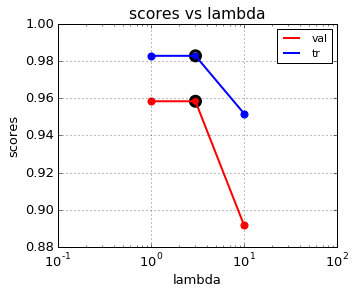

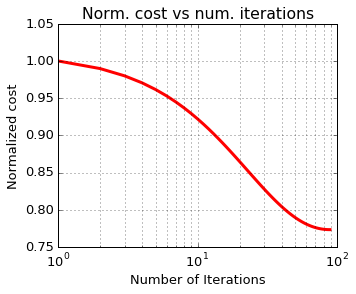


data:
	file: Data\Medium\linear2_tr.csv
	m = 41 training examples
	n = 2 features
	original classes: [0.0, 1.0]
	number of samples in class 0 = 25
	number of samples in class 1 = 16
solver:
	feature normalization: yes
	polynomial regression: no
	neural network config: [2, 1]
	regularization: yes (lambda = 3.0)
	method: GD
	learning rate = 0.081
output:
	* Converged
	initial cost = 0.249664134445
	final cost = 0.193058888708
	number of iterations = 88
	accuracy on the training set: 0.976
	execution time:  0.030716  sec


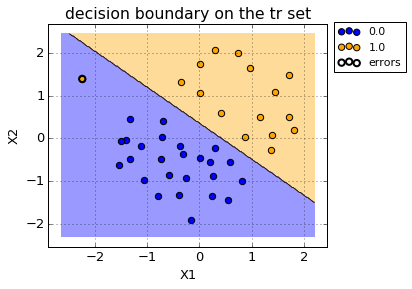

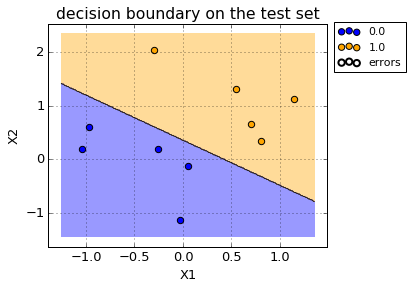



*** Data: linear3 ***


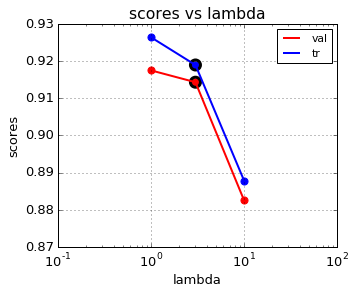

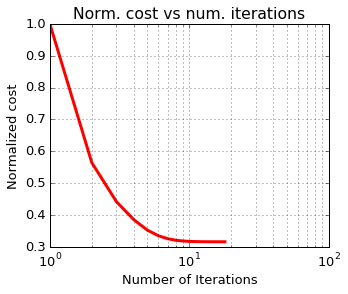


data:
	file: Data\Medium\linear3_tr.csv
	m = 211 training examples
	n = 2 features
	original classes: [0.0, 1.0]
	number of samples in class 0 = 105
	number of samples in class 1 = 106
solver:
	feature normalization: yes
	polynomial regression: no
	neural network config: [2, 1]
	regularization: yes (lambda = 3.0)
	method: GD
	learning rate = 10
output:
	* Converged
	initial cost = 0.52224596022
	final cost = 0.165160774734
	number of iterations = 17
	accuracy on the training set: 0.924
	execution time:  0.005577  sec


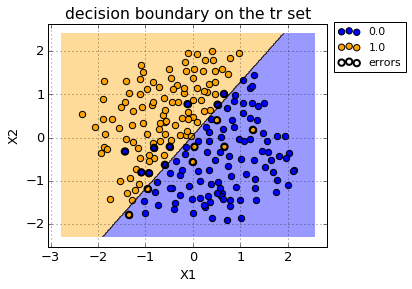

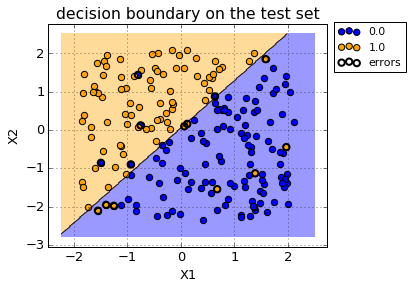



*** Data: multiclass1 ***


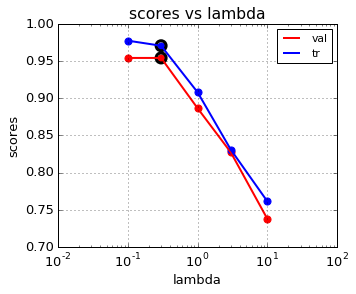

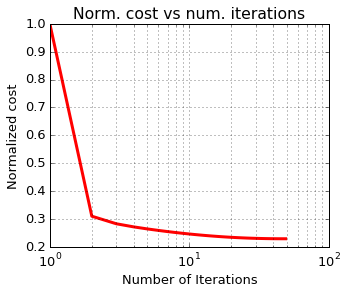


data:
	file: Data\Medium\multiclass1_tr.csv
	m = 125 training examples
	n = 2 features
	original classes: [0.0, 1.0, 2.0]
	number of samples in class 0 = 44
	number of samples in class 1 = 41
	number of samples in class 2 = 40
solver:
	feature normalization: yes
	polynomial regression: no
	neural network config: [2, 3]
	regularization: yes (lambda = 0.3)
	method: GD
	learning rate = 3.0
output:
	* Converged
	initial cost = 1.50849916032
	final cost = 0.346036994376
	number of iterations = 48
	accuracy on the training set: 0.968
	execution time:  0.020676  sec


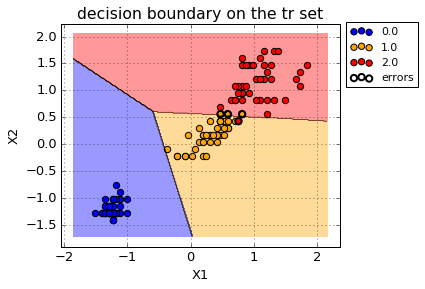

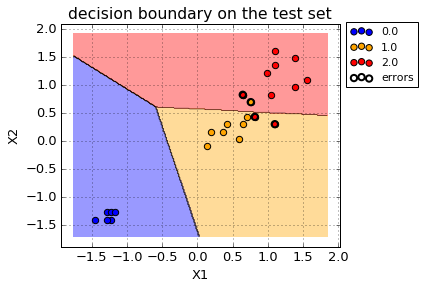



*** Summary ***


,data,normalize,method,num iter,exec time,poly deg,hidden layers,lamda,tr score,test score
0,linear1,True,GD,36,0.013819,1,[],10.0,0.914,0.947
1,linear2,True,GD,88,0.030716,1,[],3.0,0.976,1.0
2,linear3,True,GD,17,0.005577,1,[],3.0,0.924,0.93
3,multiclass1,True,GD,48,0.020676,1,[],0.3,0.968,0.84


In [4]:
scoreboard = pd.DataFrame()
for data in ['linear1','linear2','linear3','multiclass1']:
    print("\n\n*** Data:", data, "***")
    dla = vnns.DeepLearnAuto(datafile = "Data\\Medium\\"+data+"_tr.csv", 
                             normalize = True, 
                             polydeg = 1,
                             method = 'GD',                             
                             initialize = 'deep',
                             learning_rate= 'auto', 
                             lamda = 'auto',
                             maxiter = 10000, 
                             hidden_units = [],
                             plot_J = True, 
                             report_summary = True, 
                             plot_output = True,
                             plot_test = True,
                             plot_lam = True)
    summary = dla.generate_summary()
    scoreboard = scoreboard.append(summary,ignore_index=True)
print ("\n\n*** Summary ***")
display(scoreboard)

<font color=darkblue> A quick visual inspection suggests that the decision boundaries look reasonable and there is no overfitting issue in any of the solutions.  To visually illustrate what happens in the absence of regularization, let's run linear2 again by setting lamda = 0:

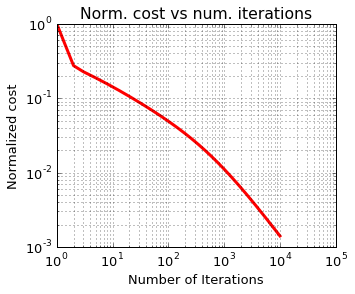

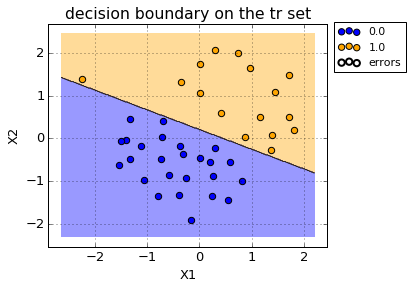

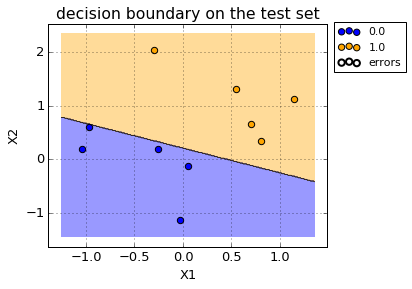

,data,normalize,method,num iter,exec time,poly deg,hidden layers,lamda,tr score,test score
0,linear2,True,GD,10000,2.316542,1,[],0,1.0,1.0


In [5]:
dla = vnns.DeepLearnAuto(datafile = "Data\\Medium\\linear2_tr.csv", 
                         normalize = True,                             
                         polydeg = 1,
                         method = 'GD', 
                         initialize = 'deep',
                         learning_rate= 'auto', 
                         lamda = 0,
                         maxiter = 10000, 
                         hidden_units = [],
                         plot_output = True,
                         plot_J = True,
                         plot_test = True)
summary = dla.generate_summary()
display(summary)

<font color=darkblue> Now note the decision boundary slope change to include the outlier data point (located at X1 < -2) into class 1. Such overfitting was prevented earlier by regularization (via lamda = 3, calculated by the script in auto mode.) Another item worth noticing is how much the number of iterations were reduced in regularized model compared to model without regularization. Also note that for lamda = 0 test score did not decrease despite overfitting. This is due to very small number of data points in this particular test set. And finally the regularized model is a better model despite its slightly lower training score compared to unregularized model. 

<font color=darkblue> In this notebook, we were able to find a reasonable decision boundary for four of the datasets that were the simplest amongst the 15 datasets. For the remaining 11 datasets we will continue, in the next notebook, by trying a slightly more complex network where a single hidden layer will be inserted between the input and output layers.